# day 183,day 185,day 188,day191

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from sklearn.model_selection import train_test_split
import zipfile
import os
import tensorflow_hub as hub
import datetime
import pytz
import matplotlib.image as image
import pandas as pd
from io import BytesIO
import requests

# exercise 1:

* Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction (mobilenet_v2_100_224/feature_vector) from TensorFlow Hub, how does it perform compared to our other models?

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip.extractall()
zip.close()

--2023-09-26 13:13:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   244MB/s    in 0.7s    

2023-09-26 13:13:23 (244 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# preparing train_dir and test_dir

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_10_percent = train_datagen.flow_from_directory(directory=train_dir,
                                      batch_size=32,
                                      target_size=(224,224),
                                      class_mode='sparse',
                                      seed=42)


test_data = test_datagen.flow_from_directory(directory=train_dir,
                         batch_size=32,
                         target_size=(224,224),
                         class_mode='sparse',
                         seed=42)


Found 750 images belonging to 10 classes.
Found 750 images belonging to 10 classes.


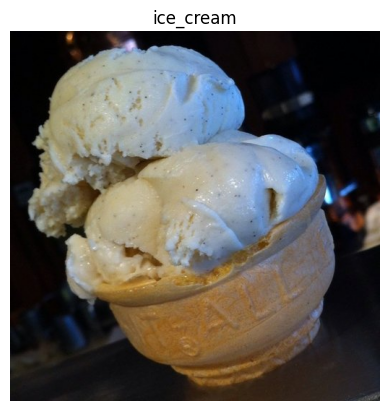

In [ ]:
# viewing a random picture from the train_dir

def show_image(train_or_test):

  dir = '10_food_classes_10_percent'
  random_class = np.random.choice(os.listdir(dir + '/' + train_or_test))
  random_image = np.random.choice(os.listdir(dir + '/' + train_or_test + '/' + random_class))

  full_path = dir + '/' + train_or_test + '/' + random_class + '/' + random_image

  image_in_numbers = image.imread(full_path)

  plt.imshow(image_in_numbers)

  plt.axis('off')
  plt.title(random_class)

  plt.show()



show_image('train')






In [ ]:
# creating a TBC

def TBC(dir_name,experiment_name):

  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now(pytz.timezone('Asia/Calcutta')).strftime('%y%m%d-%H%M%S')

  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

  print('saving the model to the specified directory'.format(log_dir))
  return tensorboard_callback


In [ ]:
# create the model with feature extracted layer

def create_model(model_url,num_classes):

  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            input_shape=(224,224,3),
                                            name='feature_extraction_layer')

  model = tf.keras.Sequential()
  model.add(feature_extraction_layer)
  model.add(tf.keras.layers.Dense(num_classes,activation='softmax',name='output_layer'))

  return model

In [ ]:
# creating, compiling and fitting
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"
mobilnet_model = create_model(model_url,train_data_10_percent.num_classes)


# compiling the model
mobilnet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])


# fit the model
mobilnet_model_history = mobilnet_model.fit(train_data_10_percent,
                                            epochs=5,
                                            steps_per_epoch=len(train_data_10_percent),
                                            validation_data=test_data,
                                            validation_steps=len(test_data))






Epoch 1/5
24/24 [==============================] - 18s 237ms/step - loss: 1.9721 - accuracy: 0.3453 - val_loss: 1.2797 - val_accuracy: 0.6333
Epoch 2/5
24/24 [==============================] - 4s 175ms/step - loss: 1.0474 - accuracy: 0.7147 - val_loss: 0.8019 - val_accuracy: 0.7893
Epoch 3/5
24/24 [==============================] - 4s 187ms/step - loss: 0.7351 - accuracy: 0.8067 - val_loss: 0.6117 - val_accuracy: 0.8493
Epoch 4/5
24/24 [==============================] - 6s 266ms/step - loss: 0.5884 - accuracy: 0.8493 - val_loss: 0.5007 - val_accuracy: 0.8760
Epoch 5/5
24/24 [==============================] - 5s 208ms/step - loss: 0.4812 - accuracy: 0.8813 - val_loss: 0.4191 - val_accuracy: 0.9107


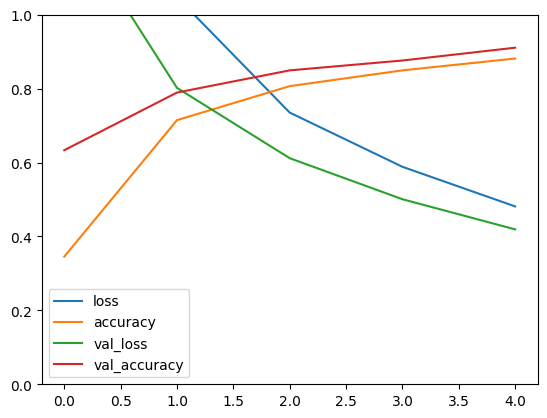

'so far so good! it outperformed every other model we have seen so far!'

In [ ]:
# it performs amazingly well

#lets visualize the loss-accuracy curves

pd.DataFrame(mobilnet_model_history.history).plot()

plt.ylim([0,1])

plt.show()

# conclusion:
'''so far so good! it outperformed every other model we have seen so far!'''

# exercise 2; Name 3 different image classification models on TensorFlow Hub that we haven't used.


1. we haven't used egetpu/vision/mobilnet model
2. bitm-r 101 model
3. experts/bit/r50 model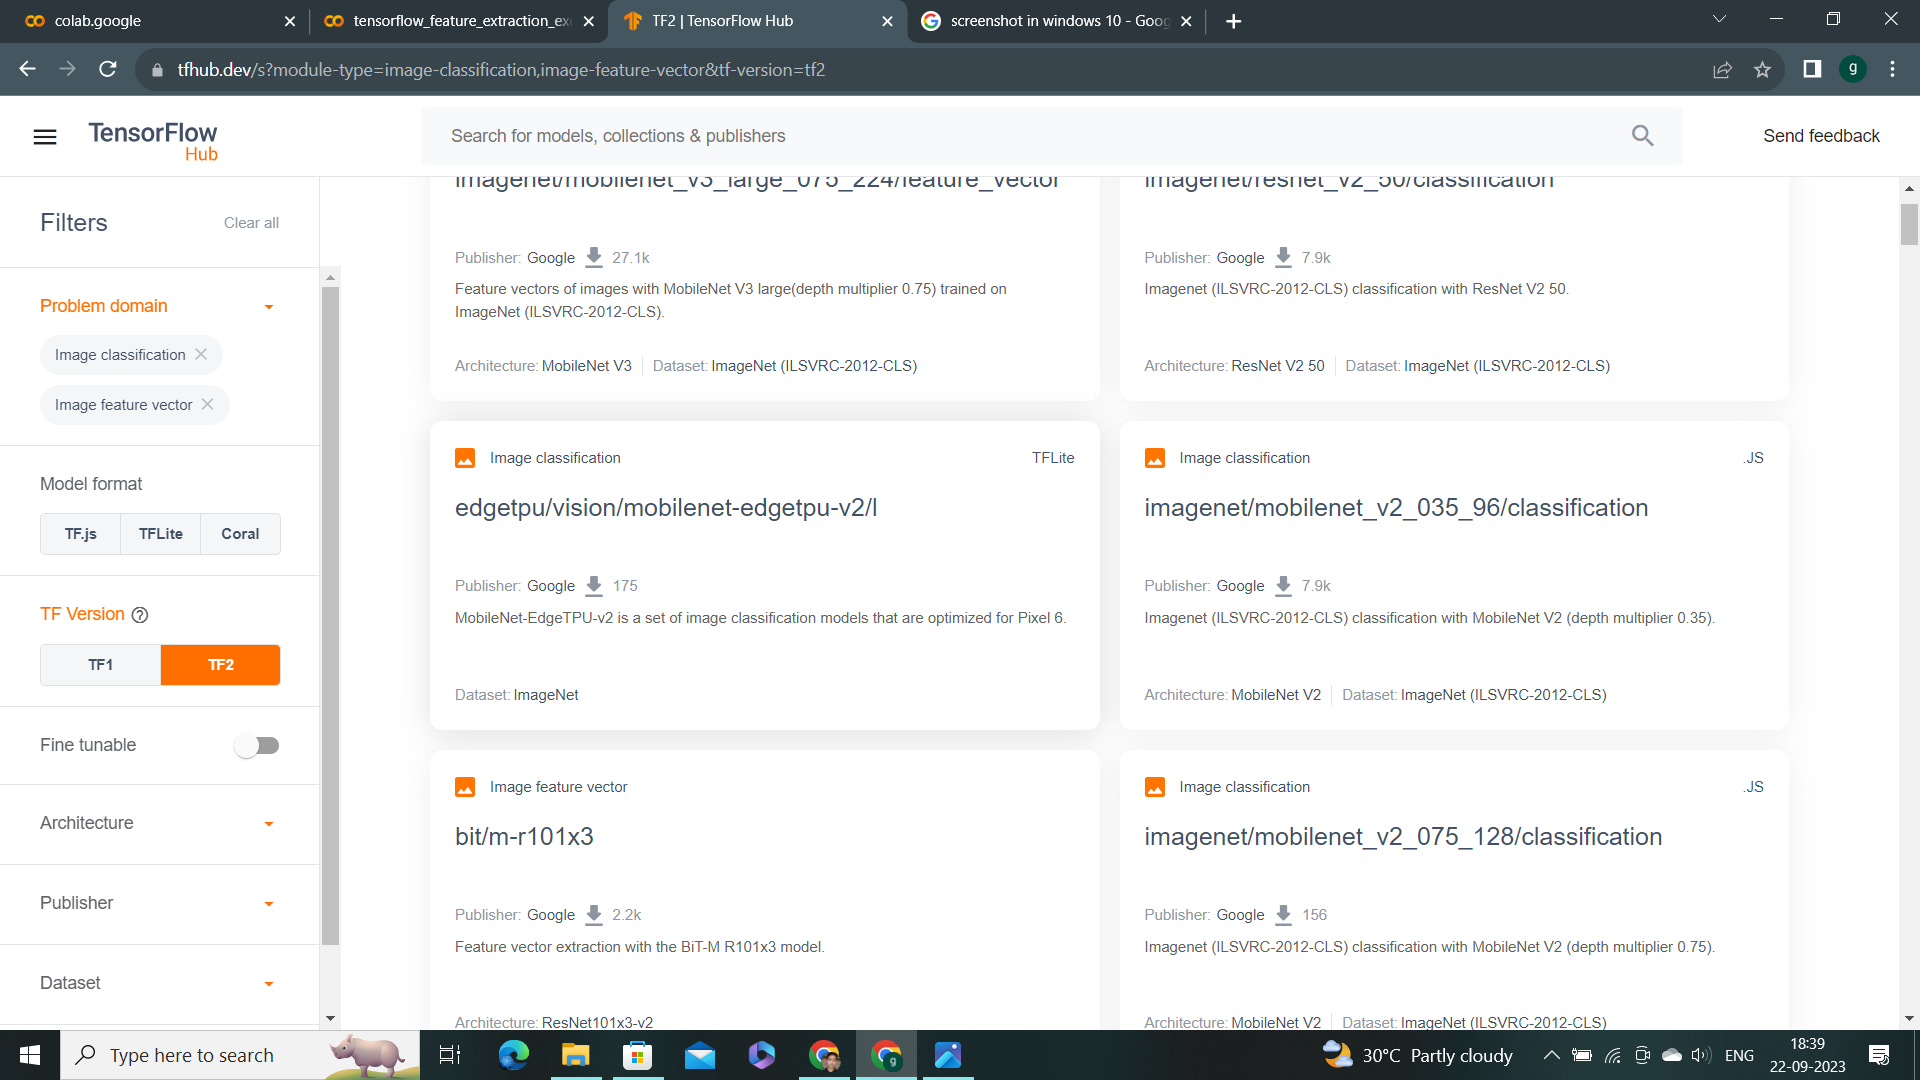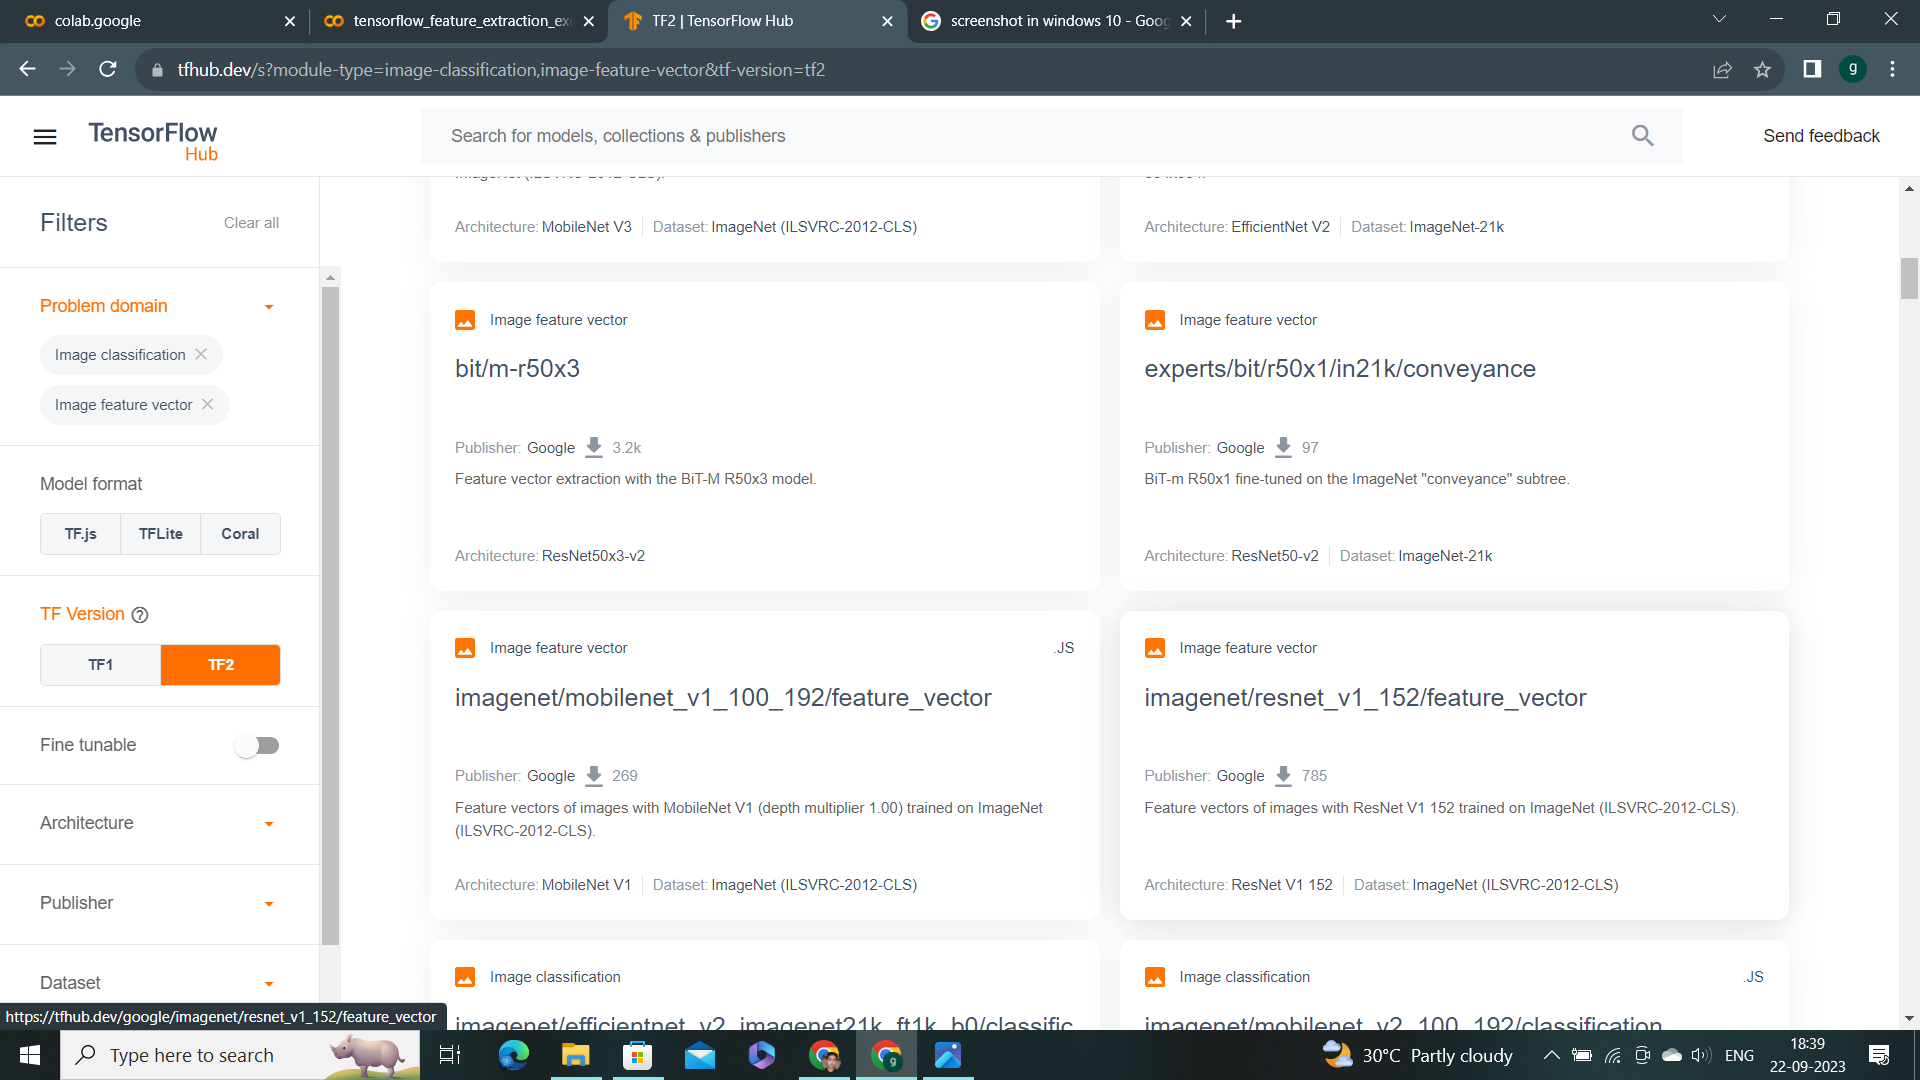

# exercise 3: Build a model to classify images of two different things you've taken photos of.

In [ ]:
train_dir = 'drive/MyDrive/scrap/train'
test_dir = 'drive/MyDrive/scrap/test'

train_datagen = ImageDataGenerator(rescale=1/255.)


test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=5,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=5,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)



Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
# create TBC

def TBC(dir_name,experiment_name):

  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now(pytz.timezone('Asia/Calcutta')).strftime('%y%m%d-%H%M%S')

  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


  return tensorboard_callback



# create the feature extraction layer

def create_model(model_url,num_classes):

  feature_extraction_layer = hub.KerasLayer(model_url,
                                              trainable=False,
                                              input_shape=(224,224,3),
                                              name='feature_extraction_layer')


  model = tf.keras.Sequential()
  model.add(feature_extraction_layer)
  model.add(tf.keras.layers.Dense(1,activation='relu',name='output_layer'))


  return model



# creating the model
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_100_192/feature_vector/5"

imagenet_model = create_model(model_url,1)


# compiling the model
imagenet_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=['accuracy'])

tf.random.set_seed(42)
# fitting the model with TBC callback
imagenet_history = imagenet_model.fit(train_data,
                   epochs=20,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data),
                   callbacks=[TBC(dir_name='Hub',experiment_name='imagenet_mobilenet_v1')])


Epoch 1/20
10/10 [==============================] - 3s 112ms/step - loss: 5.7082 - accuracy: 0.5400 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 1s 104ms/step - loss: 5.0565 - accuracy: 0.6200 - val_loss: 3.4398 - val_accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 1s 101ms/step - loss: 1.4677 - accuracy: 0.7800 - val_loss: 1.6071 - val_accuracy: 0.9000
Epoch 4/20
10/10 [==============================] - 1s 99ms/step - loss: 1.2586 - accuracy: 0.9200 - val_loss: 1.6020 - val_accuracy: 0.9000
Epoch 5/20
10/10 [==============================] - 1s 122ms/step - loss: 0.8248 - accuracy: 0.9000 - val_loss: 1.5790 - val_accuracy: 0.9000
Epoch 6/20
10/10 [==============================] - 1s 134ms/step - loss: 1.4121 - accuracy: 0.7800 - val_loss: 1.6248 - val_accuracy: 0.9000
Epoch 7/20
10/10 [==============================] - 1s 136ms/step - loss: 2.2604 - accuracy: 0.7600 - val_loss: 1.5326 - val_accuracy: 0.9000
Epoch 8

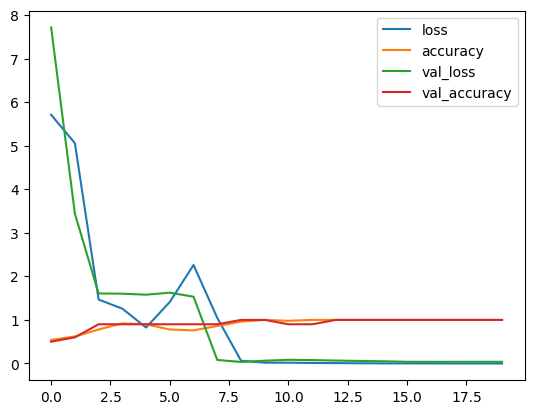

In [ ]:
pd.DataFrame(imagenet_history.history).plot()

# plt.xlim([0,1])

plt.show()

# test with random images from the internet!

In [ ]:
def load_and_preprocess(url):
  image = load_img(BytesIO(requests.get(url).content),target_size=(224,224))

  image_to_numbers = img_to_array(image)

  image_rescaled = image_to_numbers/255.

  image_expanded = tf.expand_dims(image_rescaled,axis=0)


  return image_expanded



def classify(url,model):

  preprocessed_image = load_and_preprocess(url)

  class_names = sorted(os.listdir('drive/MyDrive/scrap/train'))

  prediction = model.predict(preprocessed_image)

  if prediction < 1:
    prediction = 0

  else:
    prediction = 1

  prediction_label = class_names[prediction]
  # show the image with prediction label

  plt.imshow(tf.squeeze(preprocessed_image))

  plt.title(prediction_label)


  plt.axis('off')

  plt.show()




1/1 [==============================] - 0s 262ms/step


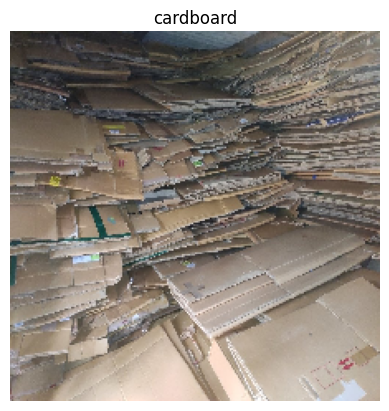

In [ ]:
url = 'https://5.imimg.com/data5/MV/UE/QN/ANDROID-52230850/product-jpeg.jpg'

classify(url,imagenet_model)

1/1 [==============================] - 0s 22ms/step


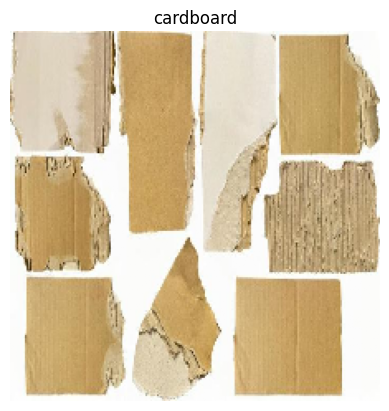

In [ ]:
url = 'https://thumb.photo-ac.com/32/32e5035f519a09f24c280e0e74332147_t.jpeg'

classify(url,imagenet_model)

1/1 [==============================] - 0s 23ms/step


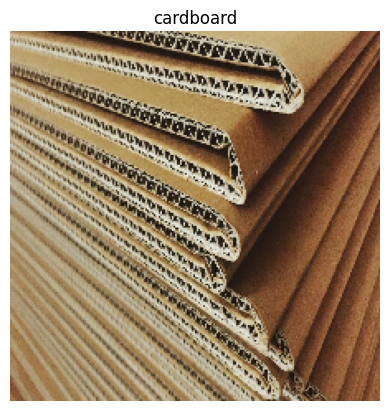

In [ ]:
url = 'https://i.insider.com/5f3d87ec42f43f001ddfde70?width=1200&format=jpeg'

classify(url,imagenet_model)

1/1 [==============================] - 0s 21ms/step


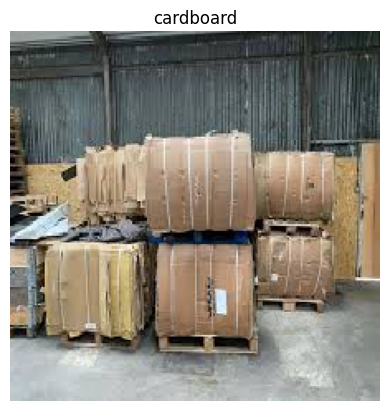

In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaOAAvhlRb_MpnU5gzB6v0CjIhDDRPyFnCDA&usqp=CAU'

classify(url,imagenet_model)

1/1 [==============================] - 0s 27ms/step


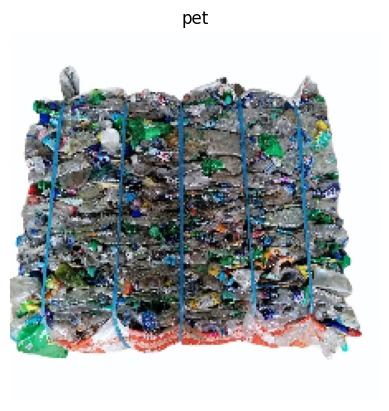

In [ ]:
url = 'https://5.imimg.com/data5/SELLER/Default/2023/8/335763625/JR/VT/JN/40256370/pet-bottle-cap-scrap.jpeg'

classify(url,imagenet_model)

1/1 [==============================] - 0s 23ms/step


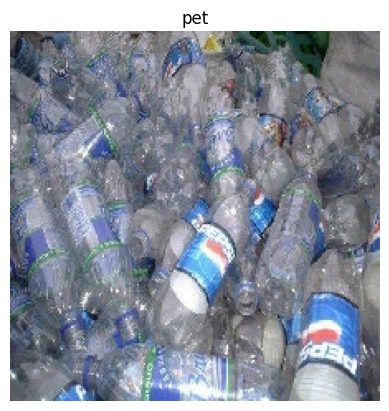

In [ ]:
url = 'https://img3.exportersindia.com/product_images/bc-full/2021/8/9239927/plastic-bottle-scrap-1630420350-5967564.jpeg'

classify(url,imagenet_model)

1/1 [==============================] - 0s 32ms/step


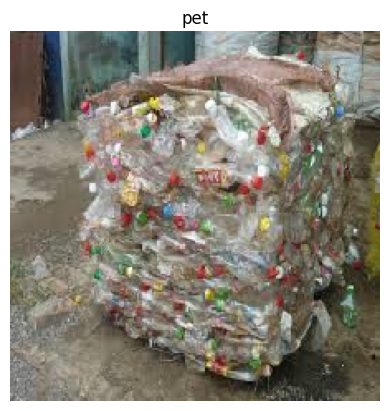

In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8aeQAnGJ0cgDphCv807S8LmEfVPsDJvMq0Q&usqp=CAU'

classify(url,imagenet_model)

1

# exploration,analysis and freethrows:


# feature extraction layer:
* the pretrained-model's features are not updated to learn the patterns of our new samples. the pre-learned patterns are kept intact turing training by setting trainable=False.

# fine-tuning:
* fine-tuning is done only after checking with feature extraction layer to further improve the accuracy of the model.
* we should only try to fine-tune or control few top layers of the pretrained-model rather than trying to fine tune all layers of the model because trying to tune all the layers would make the pretrained-model forget all its pretrained patterns.
* Here we say only "top" layers because the top layers only learn some generalizable patterns that are generalizable to all kinds of images but as we go deeper into the network there will be specialized layers that are more specific to the images that the model was trained on so we want to keep these specialized layers intact to see how they perform on unseen samples.  
* so we freeze those genearalizable layers and train only those specialized layers.  
* fine-tuning is only recommended if our data is too large and has some resemblance to the original data that the pre-trained model was trained on.    

# fine-tuning and biology:

* natural systems preserve some information about what their ancestors and predecessors went through through genes. so, when they were presented with similar challenges as were their ancestors they may have some atleast some intuition about the challenge and also may have some tricks up their sleeve to solve it this information transfer from systems from the past to the systems in the future is guided and pruned by natural selection(that which was best for solving a challenge will be preference the challenge here is survival!)

* similarly transferring some layers of image pattern recognition pattern developed by one model to another model as initial weights is predicated upon this idea of imparting the other model its intuition to recognise patterns in the image rather than taking some random initial weights, the model is fed with general pattern(first few layers) developed by a large model.

# day 190,day 192

In [ ]:
# importing the essentials

import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime


In [ ]:
# getting the url of two transfer learning models from tensorflow hub

mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2

In [ ]:
# nice concatenating technique!
(224,224) + (3,)

(224, 224, 3)

In [ ]:
# creating the model
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

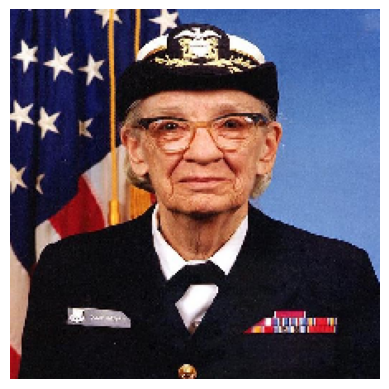

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

grace_hopper = load_img(tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg'),
                        target_size=(224,224))
image_to_numbers = img_to_array(grace_hopper)
rescaled = image_to_numbers/255.
expanded = tf.expand_dims(rescaled,axis=0)

plt.imshow(rescaled)

plt.axis('off')
plt.show()


In [ ]:
rescaled.shape

(224, 224, 3)

In [ ]:
result = classifier.predict(expanded)
result.shape

1/1 [==============================] - 0s 451ms/step


(1, 1001)

In [ ]:
predicted_class = tf.math.argmax(result,axis=1)
predicted_class

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([653])>

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# imagenet_labels = np.array(open(labels_path).read().splitlines())


image_labels = np.array(open(labels_path).read().splitlines())

image_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

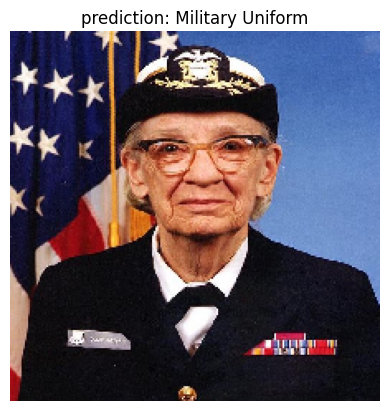

In [ ]:

plt.imshow(rescaled)

plt.axis('off')


plt.title('prediction: ' + (image_labels[predicted_class.numpy()[0]]).title())

plt.show()

# tangent notes:

* the reason i believe why it may have failed to classify images with right labels can be attributed to the fact that the pre-trained model was trained on differnt images than the ones we show it to classify, so we may have to fine-tune or train the layers of the model a bit to make it classify our problem with precision.

* To do that, you can:

1. Select a pre-trained model from TensorFlow Hub;

2. Retrain the top (last) layer to recognize the classes from your custom dataset

# this is a flowers dataset

In [ ]:
import pathlib

data_file = tf.keras.utils.get_file(
  'flower_photos.tgz',
  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
  cache_dir='.',
   extract=True)

'''cache_dir = '.' means it saves the cache_data in the current directory. it can also be set any directory of your
choice provided the name of the directory'''

data_root = pathlib.Path(data_file).with_suffix('')

In [ ]:
data_root

PosixPath('datasets/flower_photos')

In [ ]:
str(data_root)

'datasets/flower_photos'

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

directory = str(data_root)

train_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
class_names = np.array(train_ds.class_names)
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [ ]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# do this inside the model only not outside like done here for model's flexibility because what works for python
# may not work for javascript

normalization_layer = tf.keras.layers.Rescaling(1/255.)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x),y))
val_ds = val_ds.map(lambda x,y: (normalization_layer(x),y))

In [ ]:
tf.data.AUTOTUNE

-1

In [ ]:
train_ds.cache()

<CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# we use data.prefetch to avoid I/O blocking issues when fetching the data from the disk.
# these are some of the most important tf.data parameters you should use when loading data.

train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)



In [ ]:
for image_batch,label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 224, 224, 3)
(32,)


# Run the classifier on the batches of images:

In [ ]:
result_batch = classifier.predict(train_ds)

92/92 [==============================] - 8s 76ms/step


In [ ]:
prediction_class_names = image_labels[tf.math.argmax(result_batch,axis=1)]

prediction_class_names

array(['daisy', 'coral fungus', 'rapeseed', ..., 'daisy', 'daisy',
       'birdhouse'], dtype='<U30')

Text(0.5, 0.98, 'ImageNet predictions')

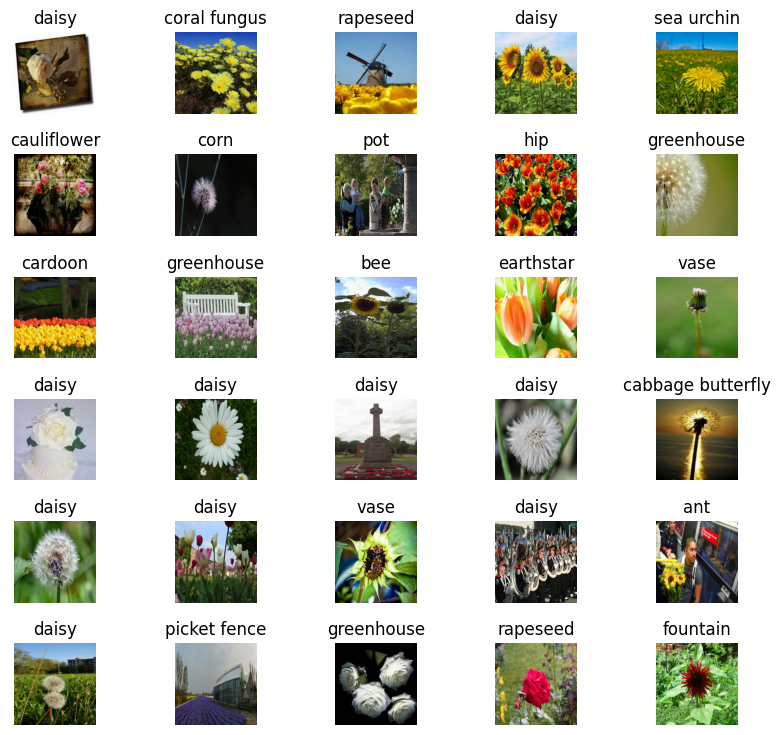

In [ ]:
# visualizing the results

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(prediction_class_names[n])
  plt.axis('off')
_# you put this underscore to show it in the right order




# the above model doesn't perform well

In [ ]:
# now working with the feature extraction model!

mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

feature_extractor_model = mobilenet_v2

In [ ]:
# importing the essentials from tensorflow hub
feature_extractor_layer = hub.KerasLayer(feature_extractor_model,
                                         trainable=False,
                                         input_shape=(224,224,3),
                                         )


In [ ]:
# image_batch is x_train and label_batch is y_train

# we are passing the x_train whose alias is image_batch into feature_extractor_layer
feature_batch = feature_extractor_layer(image_batch)
feature_batch

<tf.Tensor: shape=(32, 1280), dtype=float32, numpy=
array([[0.15761429, 0.15906356, 0.82253224, ..., 0.        , 1.2439835 ,
        1.3432754 ],
       [0.        , 4.307206  , 0.        , ..., 0.        , 0.        ,
        0.03078411],
       [1.9103888 , 0.25833473, 0.01158829, ..., 0.47424665, 0.        ,
        0.24840872],
       ...,
       [0.        , 1.4414312 , 0.        , ..., 0.        , 0.14896154,
        0.18651843],
       [0.        , 2.025659  , 0.        , ..., 0.01406599, 0.1286156 ,
        0.10808536],
       [0.        , 0.44092643, 0.        , ..., 0.        , 0.00453461,
        0.        ]], dtype=float32)>

In [ ]:
# creating a model with num classes and feature extraction layer in it.
num_classes = len(class_names)

model = tf.keras.Sequential()
model.add(feature_extractor_layer)
model.add(tf.keras.layers.Dense(num_classes))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# making predictions from the model

predictions = model(image_batch)
predictions.shape

TensorShape([32, 5])

In [ ]:
import datetime
import pytz
# compile the model and create TensorBoard Callback
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


log_dir = 'tensorboard' + 'feature_extraction_test' + datetime.datetime.now(pytz.timezone('Asia/Calcutta')).strftime('%y%m%d-%H%M%S')

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                               histogram_freq=1) # enables histogram computation for every epoch


In [ ]:
# fit the model

history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=tensorboard_callback)

Epoch 1/10
92/92 [==============================] - 12s 82ms/step - loss: 0.7076 - accuracy: 0.7463 - val_loss: 0.4297 - val_accuracy: 0.8624
Epoch 2/10
92/92 [==============================] - 8s 83ms/step - loss: 0.3592 - accuracy: 0.8770 - val_loss: 0.3423 - val_accuracy: 0.8910
Epoch 3/10
92/92 [==============================] - 6s 66ms/step - loss: 0.2828 - accuracy: 0.9094 - val_loss: 0.3106 - val_accuracy: 0.8937
Epoch 4/10
92/92 [==============================] - 8s 85ms/step - loss: 0.2362 - accuracy: 0.9268 - val_loss: 0.2954 - val_accuracy: 0.8965
Epoch 5/10
92/92 [==============================] - 10s 105ms/step - loss: 0.2028 - accuracy: 0.9421 - val_loss: 0.2871 - val_accuracy: 0.9033
Epoch 6/10
92/92 [==============================] - 6s 66ms/step - loss: 0.1770 - accuracy: 0.9506 - val_loss: 0.2822 - val_accuracy: 0.9046
Epoch 7/10
92/92 [==============================] - 7s 74ms/step - loss: 0.1563 - accuracy: 0.9591 - val_loss: 0.2792 - val_accuracy: 0.9060
Epoch 8/10

In [ ]:
# making predictions

predictions = model(image_batch)
prediction_label = class_names[tf.math.argmax(predictions,axis=1)]

prediction_label

array(['roses', 'dandelion', 'tulips', 'sunflowers', 'dandelion', 'roses',
       'dandelion', 'roses', 'tulips', 'dandelion', 'tulips', 'tulips',
       'sunflowers', 'tulips', 'dandelion', 'roses', 'daisy', 'tulips',
       'dandelion', 'dandelion', 'dandelion', 'tulips', 'sunflowers',
       'roses', 'sunflowers', 'dandelion', 'tulips', 'roses', 'roses',
       'sunflowers', 'tulips', 'sunflowers'], dtype='<U10')

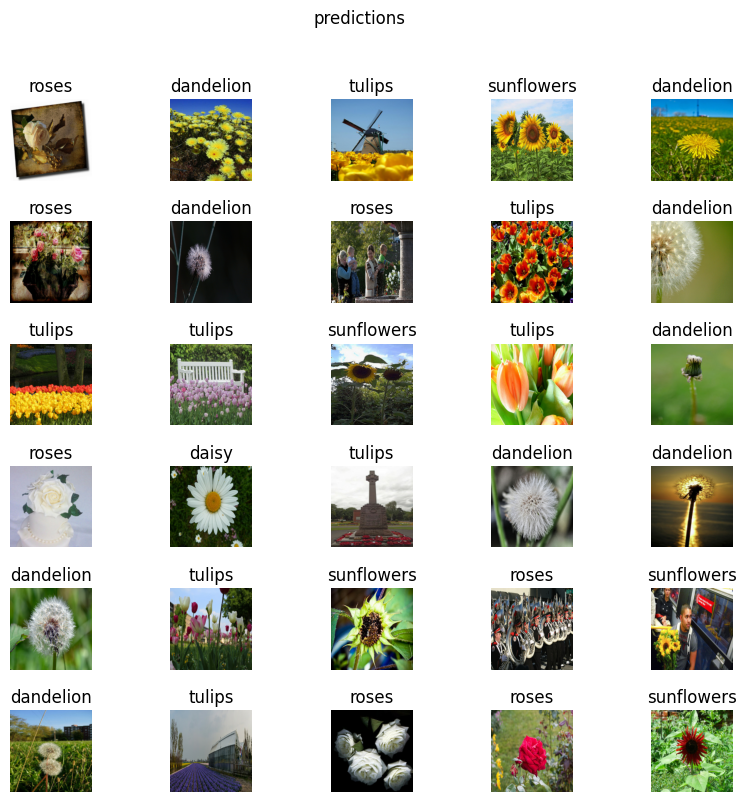

In [ ]:
# visualizing the results(lets see if the model is able to predict accurately now!)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(image_batch[i])
  plt.title(prediction_label[i])
  plt.axis('off')
_ =plt.suptitle('predictions')

# this model has performed better!

In [ ]:
# exporting and reloading  the model
from pathlib import Path
model_path = Path('saved')
model_path.mkdir(parents=True,exist_ok=True)
model_name = 'test_model'
time = datetime.datetime.now(pytz.timezone('Asia/Calcutta')).strftime('%y%m%d-%H%M%S')
model_saved_path = model_path/model_name/time

# saving the model
model.save(model_saved_path)


In [ ]:
# load the saved model

loaded_model = tf.keras.models.load_model(model_saved_path)

In [ ]:
# comparing the original model's prediction with loaded_model's prediction
loaded_model_predictions = loaded_model.predict(image_batch)



1/1 [==============================] - 0s 52ms/step


True

In [ ]:
# checking whether loaded_model_predictions == predictions made by our original model

np.sum(loaded_model_predictions == predictions) == (np.shape(predictions)[0] * np.shape(predictions)[1])

# day 194

# fine-tuning a model

# words i still have doubts on and got apt explanation from AI:
1.  Fine-tuning changes the "continuous" model parameters that are trained. It does not change hard-coded transformations, such as tokenizing text input and mapping tokens to their corresponding entries in an embedding matrix.
2. enables fine-tuning of the SavedModel loaded by the layer. It adds the trainable weights and weight regularizers declared in the SavedModel to the Keras model, and runs the SavedModel's computation in training mode (think of dropout etc.).what is dropout here?


# explanation:
1. fine-tuning only changes the soft-coded programs or neurons, fine-tuning does not change the hard-coded transformatins.
2. dropping out regularization technique that prevents the model from overfitting on training data. Dropping out involves dropping out few neurons that are too specialized. By dropping out these neurons we are making the model generalize and predict well on the unseen data.



# Look into experiment tracking with Weights & Biases, how could you integrate it with our existing TensorBoard logs?

In [3]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=a0f74a3613c04cda15e8927015aaee493d377cdcb6c365915f2c699589d2ca83
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [6]:
import tensorflow as tf

In [7]:
import wandb

# initializing the wandb
wandb.init(project='gpt3')

# save model inputs and hyper parameters
config = wandb.config
config.learning_rate = 0.01

# log metrics over time to visualize performance
with tf.Session() as sess:
  wandb.tensorflow.log(tf.summary.merge_all())

AttributeError: ignored

# imposter syndrome:

* the feeling that you are not good enough when compared to others.
* valuable skills take Time to learn and master
* don't get disappointed and give up midway in a project.
* analyse if knowing the unknowns would save you TIME, if it would why not give it a shot? 
* remember! you never understand things you only would get used to them.